In [1]:
#FINAL PROJECT: Diabetes Classification Without Using HBA1C or Blood Sugar
#Data source: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#

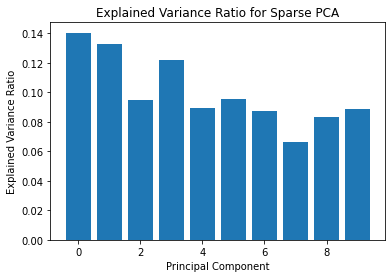

Sparse PCA Statistics:
Explained Variance Ratio:
Principal Component 1: 0.1403
Principal Component 2: 0.1325
Principal Component 3: 0.0946
Principal Component 4: 0.1217
Principal Component 5: 0.0895
Principal Component 6: 0.0956
Principal Component 7: 0.0875
Principal Component 8: 0.0663
Principal Component 9: 0.0830
Principal Component 10: 0.0890

Key Features:
Principal Component 1: Polyuria_Yes
Principal Component 2: Itching_Yes
Principal Component 3: sudden weight loss_Yes
Principal Component 4: visual blurring_Yes
Principal Component 5: Polyphagia_Yes
Principal Component 6: Gender_Male
Principal Component 7: weakness_Yes
Principal Component 8: Irritability_Yes
Principal Component 9: Alopecia_Yes
Principal Component 10: partial paresis_Yes


In [8]:
#Analyze the dataset after running sparse PCA.  What do we know about the attributes?

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA
from sklearn.model_selection import train_test_split

# Get the current directory
current_dir = os.getcwd()

# Find the .csv file in the current directory
csv_files = [file for file in os.listdir(current_dir) if file.endswith(".csv")]

# Check if the .csv file exists
if "diabetes_data_upload.csv" in csv_files:
    dataset_file = os.path.join(current_dir, "diabetes_data_upload.csv")
else:
    raise FileNotFoundError("diabetes_data_upload.csv file not found in the current directory.")

# Define a data loader function
def load_dataset(file_path):
    # Load the dataset from the CSV file
    df = pd.read_csv(file_path)

    # Perform one-hot encoding for categorical variables
    df_encoded = pd.get_dummies(df, drop_first=True)
    
    # Get the feature names
    feature_names = df_encoded.columns[:-1]  # Exclude target variable

    # Extract the feature matrix X
    X = df_encoded.iloc[:, :-1].values

    X[:,0] = X[:,0]/max(X[:,0])
    
    # Extract the target variable y
    y = df_encoded.iloc[:, -1].values

    return X, y, feature_names

# Load the dataset using the data loader
X, y, feature_names = load_dataset(dataset_file)

# Initialize SparsePCA
sparse_pca = SparsePCA(n_components=10, random_state=42)

# Fit and transform the data
X_sparse = sparse_pca.fit_transform(X)

# Calculate the explained variance ratio manually
explained_variance = np.var(X_sparse, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Plot explained variance ratio
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Sparse PCA')
plt.show()


# Identify key features
key_features = np.abs(sparse_pca.components_).argmax(axis=1)

# Print statistics, plots, and key features
print("Sparse PCA Statistics:")
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

print("\nKey Features:")
for i, feature_idx in enumerate(key_features):
    print(f"Principal Component {i+1}: {feature_names[feature_idx]}")


#####
After PCA, perform Logistic Regression
#####

In [33]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Define hyperparameters for Logistic Regression
log_reg_params = {
    'penalty': 'l2',  # Regularization penalty ('l1', 'l2', 'elasticnet', 'none')
    'C': 1.0,  # Inverse of regularization strength
    'solver': 'lbfgs',  # Algorithm to use for optimization ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
    'max_iter': 100,  # Maximum number of iterations
    'random_state': 42  # Random seed for reproducibility
}

# Initialize Logistic Regression with hyperparameters
log_reg = LogisticRegression(**log_reg_params)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)


In [34]:
#Stats and plots for LogReg

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.94      0.90      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.89      0.88       104
weighted avg       0.90      0.89      0.90       104



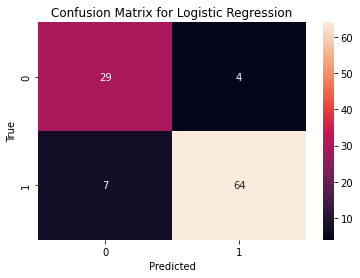

In [35]:

# Fit the model and make predictions
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


######
2. Run Random Forest
#####

In [36]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
random_forest.fit(X_train, y_train)

# Predict the test set results
y_pred = random_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.99      0.96      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



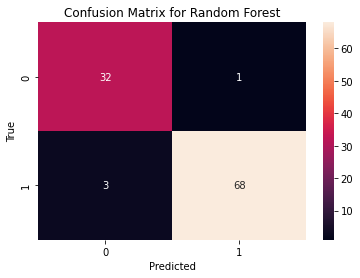

In [37]:
# Fit the model and make predictions
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Think about early stopping

For PPT 
2-3 slides
1. What Why When ?
2. Method, Architecture
3. Results


## Deep and Wide NN

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Hyperparameters
hyper_params = {
    'batch_size': 16,
    'learning_rate': 0.01,
    'epochs': 100,
    'input_size': X_sparse.shape[1],
    'hidden_size': 1000,
    'output_size': 1,
    'dropout_rate': 0.85,
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Convert to tensors
X_tensor = torch.tensor(X_train.astype(np.float32))
y_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)

# Create a Dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the Deep and Wide neural network
class DeepWideNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(DeepWideNN, self).__init__()
        self.deep = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        out = self.deep(x)
        return out

# Initialize the model, loss function, and optimizer
nn_model = DeepWideNN(
    input_size=hyper_params['input_size'],
    hidden_size=hyper_params['hidden_size'],
    output_size=hyper_params['output_size'],
    dropout_rate=hyper_params['dropout_rate']
).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(nn_model.parameters(), lr=hyper_params['learning_rate'])

# Training loop
for epoch in range(hyper_params['epochs']):
    for i, (inputs, labels) in enumerate(data_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = nn_model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{hyper_params["epochs"]}, Loss: {loss.item()}')

# Display the final loss
print(f"Final Loss: {loss.item()}")

# Save the model
torch.save(nn_model.state_dict(), "nn_model.pth")


Epoch 1/100, Loss: 0.5813491940498352
Epoch 2/100, Loss: 0.525222659111023
Epoch 3/100, Loss: 0.287699431180954
Epoch 4/100, Loss: 0.24545252323150635
Epoch 5/100, Loss: 0.2532138228416443
Epoch 6/100, Loss: 0.2991113066673279
Epoch 7/100, Loss: 0.19624315202236176
Epoch 8/100, Loss: 0.18487957119941711
Epoch 9/100, Loss: 0.416533499956131
Epoch 10/100, Loss: 0.5186043381690979
Epoch 11/100, Loss: 0.13218653202056885
Epoch 12/100, Loss: 0.23239590227603912
Epoch 13/100, Loss: 0.28210633993148804
Epoch 14/100, Loss: 0.23723775148391724
Epoch 15/100, Loss: 0.28913402557373047
Epoch 16/100, Loss: 0.16216611862182617
Epoch 17/100, Loss: 0.2732364237308502
Epoch 18/100, Loss: 0.3991966247558594
Epoch 19/100, Loss: 0.28589916229248047
Epoch 20/100, Loss: 0.1634618192911148
Epoch 21/100, Loss: 0.3388105630874634
Epoch 22/100, Loss: 0.2526783347129822
Epoch 23/100, Loss: 0.2881762683391571
Epoch 24/100, Loss: 0.2934470474720001
Epoch 25/100, Loss: 0.30502066016197205
Epoch 26/100, Loss: 0.1861

## Tuning our Deep and Wide model

In [39]:
import json
from tqdm import tqdm
# Define a list or range of values for each hyperparameter
batch_sizes = [16,32,64,128, 256, 512]
learning_rates = [0.0001,0.001, 0.01, 0.1]
hidden_sizes = [50, 100, 500, 1000, 1500]
dropout_rates = [0.15, 0.3, 0.5, 0.7, 0.85]

# Placeholder variables for storing the best parameters and the best accuracy
best_params = None
best_accuracy = 0.0

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loop over the hyperparameters
for batch_size in tqdm(batch_sizes):
    for learning_rate in learning_rates:
        for hidden_size in hidden_sizes:
            for dropout_rate in dropout_rates:

                # Create a DataLoader with the current batch_size
                data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

                # Initialize the model, loss function, and optimizer with the current hyperparameters
                nn_model = DeepWideNN(
                    input_size=hyper_params['input_size'],
                    hidden_size=hidden_size,
                    output_size=hyper_params['output_size'],
                    dropout_rate=dropout_rate
                ).to(device)
                criterion = nn.BCEWithLogitsLoss()
                optimizer = optim.SGD(nn_model.parameters(), lr=learning_rate)

                # Training loop
                for epoch in range(hyper_params['epochs']):
                    for i, (inputs, labels) in enumerate(data_loader):
                        inputs, labels = inputs.to(device), labels.to(device)

                        # Forward pass
                        outputs = nn_model(inputs)
                        loss = criterion(outputs, labels)

                        # Backward and optimize
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # Evaluate the model on the test set to get the accuracy
                nn_model.eval()
                with torch.no_grad():
                    X_test_tensor = torch.tensor(X_test.astype(np.float32)).to(device)
                    y_test_tensor = torch.tensor(y_test.astype(np.float32)).unsqueeze(1).to(device)
                    outputs = nn_model(X_test_tensor)
                    predictions = torch.sigmoid(outputs) > 0.5
                    accuracy = (predictions == y_test_tensor).float().mean()

                # If the accuracy is better than the best_accuracy found so far, update the best_params and best_accuracy
                if accuracy > best_accuracy:
                    print(accuracy)
                    best_params = {'batch_size': batch_size, 'learning_rate': learning_rate, 
                                   'hidden_size': hidden_size, 'dropout_rate': dropout_rate}
                    best_accuracy = accuracy

# Print the best hyperparameters and the corresponding accuracy
print(f"Best Params: {best_params}, Best Accuracy: {best_accuracy}")

# Save the best parameters
with open("best_params.json", "w") as f:
    json.dump(best_params, f)


  0%|          | 0/6 [00:00<?, ?it/s]

tensor(0.6923)
tensor(0.7212)
tensor(0.7500)
tensor(0.7885)
tensor(0.7981)
tensor(0.8750)
tensor(0.8846)
tensor(0.8942)
tensor(0.9038)
tensor(0.9135)
tensor(0.9231)
tensor(0.9327)
tensor(0.9423)
tensor(0.9519)
tensor(0.9615)


100%|██████████| 6/6 [08:12<00:00, 82.13s/it] 

Best Params: {'batch_size': 16, 'learning_rate': 0.1, 'hidden_size': 500, 'dropout_rate': 0.15}, Best Accuracy: 0.9615384340286255


In [40]:
from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, criterion, optimizer, epochs):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.epochs = epochs

    def fit(self, X, y):

        dataset = TensorDataset(X, y)
        data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

        for epoch in range(self.epochs):
            for i, (inputs, labels) in enumerate(data_loader):
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                # Backward and optimize
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

        return self

    def predict_proba(self, X):
        with torch.no_grad():
            outputs = self.model(X)
            probs = torch.sigmoid(outputs)
            return probs.cpu().numpy()

    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas > 0.5).astype(int)

# Wrap the PyTorch model
nn_model_sklearn = PyTorchClassifier(nn_model, criterion, optimizer, epochs=hyper_params['epochs'])

# Now, you can use nn_model_sklearn in your sklearn ensemble models


              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.99      0.96      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



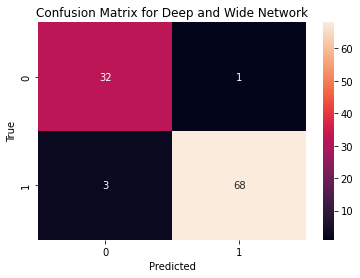

In [41]:
# Fit the model
X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.astype(np.float32))

nn_model_sklearn.fit(X_train_tensor, y_train_tensor)
y_pred = nn_model_sklearn.predict(X_test_tensor)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Deep and Wide Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#####
After running all 3 models, perform ensemble methods of VOTING and STACKING.  Compare results
#####

In [42]:
class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=5):
        self.model = model
        self.epochs = epochs

    def fit(self, X, y):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)
        self.model.fit(X_tensor, y_tensor)
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_pred = self.model.predict(X_tensor)
        return y_pred.cpu().numpy()

    def predict_proba(self, X):
        y_pred = self.predict(X)
        return np.column_stack((1 - y_pred, y_pred))

nn_model_sklearn_wrapped = PyTorchClassifierWrapper(nn_model_sklearn)


In [43]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=5):
        self.model = model
        self.epochs = epochs
        self.classes_ = None  # Initialize classes_ attribute

    def fit(self, X, y):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)
        self.classes_ = np.unique(y)  # update classes_ attribute on fit
        self.model.fit(X_tensor, y_tensor)
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_pred = self.model.predict(X_tensor)
        return y_pred 

    def predict_proba(self, X):
        y_pred = self.predict(X)
        return np.column_stack((1 - y_pred, y_pred))


nn_model_sklearn_wrapped = PyTorchClassifierWrapper(nn_model_sklearn)

# Initialize the ensemble models
voting = VotingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model_sklearn_wrapped)], voting='soft')
stacking = StackingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model_sklearn_wrapped)], final_estimator=LogisticRegression())

# Fit the voting ensemble model
voting.fit(X_train, y_train)

# Predict the test set results
y_pred_voting = voting.predict(X_test)

# Fit the stacking ensemble model
stacking.fit(X_train, y_train)

# Predict the test set results
y_pred_stacking = stacking.predict(X_test)

# Calculate the accuracy of the voting ensemble
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# Calculate the accuracy of the stacking ensemble
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Print the accuracies
print(f'Accuracy of voting ensemble: {accuracy_voting}')
print(f'Accuracy of stacking ensemble: {accuracy_stacking}')

# Choose the better model
if accuracy_voting > accuracy_stacking:
    best_model = voting
else:
    best_model = stacking


Accuracy of voting ensemble: 0.9615384615384616
Accuracy of stacking ensemble: 0.9615384615384616


Classification Report for Voting Ensemble:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.99      0.96      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



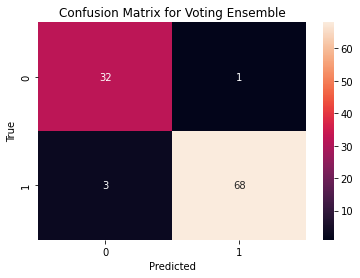

In [44]:
#Voting ensemble

# Fit the model and make predictions
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

# Print classification report
print("Classification Report for Voting Ensemble:")
print(classification_report(y_test, y_pred_voting))

# Print confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm_voting, annot=True, fmt='d')
plt.title('Confusion Matrix for Voting Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Classification Report for Stacking Ensemble:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.99      0.96      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



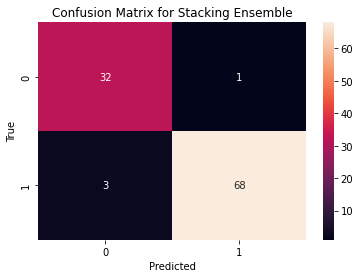

In [45]:
#Stacking ensemble

# Fit the model and make predictions
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)

# Print classification report
print("Classification Report for Stacking Ensemble:")
print(classification_report(y_test, y_pred_stacking))

# Print confusion matrix
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(cm_stacking, annot=True, fmt='d')
plt.title('Confusion Matrix for Stacking Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


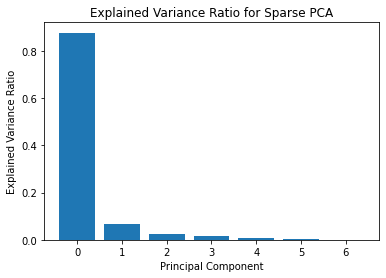

Sparse PCA Statistics:
Explained Variance Ratio:
Principal Component 1: 0.8776
Principal Component 2: 0.0676
Principal Component 3: 0.0248
Principal Component 4: 0.0168
Principal Component 5: 0.0091
Principal Component 6: 0.0041
Principal Component 7: 0.0000

Key Features:
Principal Component 1: Insulin
Principal Component 2: Glucose
Principal Component 3: BloodPressure
Principal Component 4: SkinThickness
Principal Component 5: Age
Principal Component 6: BMI
Principal Component 7: DiabetesPedigreeFunction


In [10]:
#Analyze the dataset after running sparse PCA.  What do we know about the attributes?

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA
from sklearn.model_selection import train_test_split

# Get the current directory
current_dir = os.getcwd()

# Find the .csv file in the current directory
csv_files = [file for file in os.listdir(current_dir) if file.endswith(".csv")]

# Check if the .csv file exists
if "diabetes.csv" in csv_files:
    dataset_file = os.path.join(current_dir, "diabetes.csv")
else:
    raise FileNotFoundError("diabetes.csv file not found in the current directory.")

# Define a data loader function
def load_dataset(file_path):
    # Load the dataset from the CSV file
    df = pd.read_csv(file_path)

    # Perform one-hot encoding for categorical variables
    df_encoded = pd.get_dummies(df, drop_first=True)
    
    # Get the feature names
    feature_names = df_encoded.columns[:-1]  # Exclude target variable

    # Extract the feature matrix X
    X = df_encoded.iloc[:, :-1].values

    X[:,0] = X[:,0]/max(X[:,0])
    
    # Extract the target variable y
    y = df_encoded.iloc[:, -1].values

    return X, y, feature_names

# Load the dataset using the data loader
X, y, feature_names = load_dataset(dataset_file)

# Initialize SparsePCA
sparse_pca = SparsePCA(n_components=7, random_state=42)

# Fit and transform the data
X_sparse = sparse_pca.fit_transform(X)

# Calculate the explained variance ratio manually
explained_variance = np.var(X_sparse, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Plot explained variance ratio
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Sparse PCA')
plt.show()


# Identify key features
key_features = np.abs(sparse_pca.components_).argmax(axis=1)

# Print statistics, plots, and key features
print("Sparse PCA Statistics:")
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

print("\nKey Features:")
for i, feature_idx in enumerate(key_features):
    print(f"Principal Component {i+1}: {feature_names[feature_idx]}")

In [11]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Define hyperparameters for Logistic Regression
log_reg_params = {
    'penalty': 'l2',  # Regularization penalty ('l1', 'l2', 'elasticnet', 'none')
    'C': 1.0,  # Inverse of regularization strength
    'solver': 'lbfgs',  # Algorithm to use for optimization ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
    'max_iter': 100,  # Maximum number of iterations
    'random_state': 42  # Random seed for reproducibility
}

# Initialize Logistic Regression with hyperparameters
log_reg = LogisticRegression(**log_reg_params)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



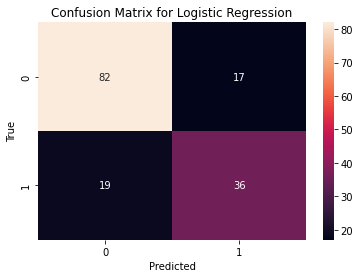

In [12]:
#Stats and plots for LogReg

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Fit the model and make predictions
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


######
2. Run Random Forest
#####

In [13]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
random_forest.fit(X_train, y_train)

# Predict the test set results
y_pred = random_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



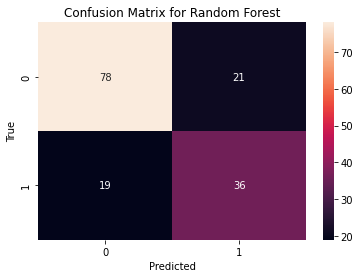

In [14]:
# Fit the model and make predictions
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Deep and Wide NN

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Hyperparameters
hyper_params = {
    'batch_size': 16,
    'learning_rate': 0.01,
    'epochs': 100,
    'input_size': X_sparse.shape[1],
    'hidden_size': 1000,
    'output_size': 1,
    'dropout_rate': 0.85,
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Convert to tensors
X_tensor = torch.tensor(X_train.astype(np.float32))
y_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)

# Create a Dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the Deep and Wide neural network
class DeepWideNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(DeepWideNN, self).__init__()
        self.deep = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        out = self.deep(x)
        return out

# Initialize the model, loss function, and optimizer
nn_model = DeepWideNN(
    input_size=hyper_params['input_size'],
    hidden_size=hyper_params['hidden_size'],
    output_size=hyper_params['output_size'],
    dropout_rate=hyper_params['dropout_rate']
).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(nn_model.parameters(), lr=hyper_params['learning_rate'])

# Training loop
for epoch in range(hyper_params['epochs']):
    for i, (inputs, labels) in enumerate(data_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = nn_model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{hyper_params["epochs"]}, Loss: {loss.item()}')

# Display the final loss
print(f"Final Loss: {loss.item()}")

# Save the model
torch.save(nn_model.state_dict(), "nn_model.pth")

Epoch 1/100, Loss: 285.64630126953125
Epoch 2/100, Loss: 2227.681396484375
Epoch 3/100, Loss: 43.9911994934082
Epoch 4/100, Loss: 13412.0078125
Epoch 5/100, Loss: 531.6267700195312
Epoch 6/100, Loss: 2397.436279296875
Epoch 7/100, Loss: 539.0026245117188
Epoch 8/100, Loss: 869.838134765625
Epoch 9/100, Loss: 552.6967163085938
Epoch 10/100, Loss: 1829.373046875
Epoch 11/100, Loss: 30818.912109375
Epoch 12/100, Loss: 1850.0203857421875
Epoch 13/100, Loss: 4481.11669921875
Epoch 14/100, Loss: 2103.671630859375
Epoch 15/100, Loss: 663.8307495117188
Epoch 16/100, Loss: 5603.86865234375
Epoch 17/100, Loss: 0.0
Epoch 18/100, Loss: 7328.05419921875
Epoch 19/100, Loss: 2941.384765625
Epoch 20/100, Loss: 5130.48486328125
Epoch 21/100, Loss: 14519.5546875
Epoch 22/100, Loss: 1193.042236328125
Epoch 23/100, Loss: 30806.556640625
Epoch 24/100, Loss: 21451.560546875
Epoch 25/100, Loss: 5701.00048828125
Epoch 26/100, Loss: 22556.0078125
Epoch 27/100, Loss: 41177.140625
Epoch 28/100, Loss: 8368.091796

## Tuning our Deep and Wide model

In [16]:
import json
from tqdm import tqdm
# Define a list or range of values for each hyperparameter
batch_sizes = [16,32,64,128, 256, 512]
learning_rates = [0.0001,0.001, 0.01, 0.1]
hidden_sizes = [50, 100, 500, 1000, 1500]
dropout_rates = [0.15, 0.3, 0.5, 0.7, 0.85]

# Placeholder variables for storing the best parameters and the best accuracy
best_params = None
best_accuracy = 0.0

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loop over the hyperparameters
for batch_size in tqdm(batch_sizes):
    for learning_rate in learning_rates:
        for hidden_size in hidden_sizes:
            for dropout_rate in dropout_rates:

                # Create a DataLoader with the current batch_size
                data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

                # Initialize the model, loss function, and optimizer with the current hyperparameters
                nn_model = DeepWideNN(
                    input_size=hyper_params['input_size'],
                    hidden_size=hidden_size,
                    output_size=hyper_params['output_size'],
                    dropout_rate=dropout_rate
                ).to(device)
                criterion = nn.BCEWithLogitsLoss()
                optimizer = optim.SGD(nn_model.parameters(), lr=learning_rate)

                # Training loop
                for epoch in range(hyper_params['epochs']):
                    for i, (inputs, labels) in enumerate(data_loader):
                        inputs, labels = inputs.to(device), labels.to(device)

                        # Forward pass
                        outputs = nn_model(inputs)
                        loss = criterion(outputs, labels)

                        # Backward and optimize
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # Evaluate the model on the test set to get the accuracy
                nn_model.eval()
                with torch.no_grad():
                    X_test_tensor = torch.tensor(X_test.astype(np.float32)).to(device)
                    y_test_tensor = torch.tensor(y_test.astype(np.float32)).unsqueeze(1).to(device)
                    outputs = nn_model(X_test_tensor)
                    predictions = torch.sigmoid(outputs) > 0.5
                    accuracy = (predictions == y_test_tensor).float().mean()

                # If the accuracy is better than the best_accuracy found so far, update the best_params and best_accuracy
                if accuracy > best_accuracy:
                    print(accuracy)
                    best_params = {'batch_size': batch_size, 'learning_rate': learning_rate, 
                                   'hidden_size': hidden_size, 'dropout_rate': dropout_rate}
                    best_accuracy = accuracy

# Print the best hyperparameters and the corresponding accuracy
print(f"Best Params: {best_params}, Best Accuracy: {best_accuracy}")

# Save the best parameters
with open("best_params.json", "w") as f:
    json.dump(best_params, f)


  0%|          | 0/6 [00:00<?, ?it/s]

tensor(0.7078)
tensor(0.7338)
tensor(0.7597)
tensor(0.7662)
tensor(0.7857)


 17%|█▋        | 1/6 [04:22<21:52, 262.45s/it]

tensor(0.7922)


100%|██████████| 6/6 [13:17<00:00, 132.92s/it]

Best Params: {'batch_size': 32, 'learning_rate': 0.01, 'hidden_size': 50, 'dropout_rate': 0.7}, Best Accuracy: 0.7922077775001526


In [17]:
from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, criterion, optimizer, epochs):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.epochs = epochs

    def fit(self, X, y):

        dataset = TensorDataset(X, y)
        data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

        for epoch in range(self.epochs):
            for i, (inputs, labels) in enumerate(data_loader):
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                # Backward and optimize
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

        return self

    def predict_proba(self, X):
        with torch.no_grad():
            outputs = self.model(X)
            probs = torch.sigmoid(outputs)
            return probs.cpu().numpy()

    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas > 0.5).astype(int)

# Wrap the PyTorch model
nn_model_sklearn = PyTorchClassifier(nn_model, criterion, optimizer, epochs=hyper_params['epochs'])

# Now, you can use nn_model_sklearn in your sklearn ensemble models


              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/Users/jack_qin/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jack_qin/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jack_qin/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


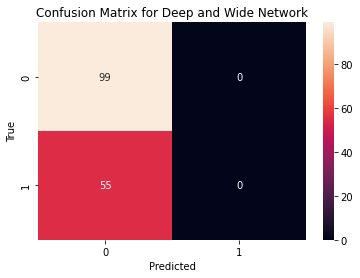

In [18]:
# Fit the model
X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.astype(np.float32))

nn_model_sklearn.fit(X_train_tensor, y_train_tensor)
y_pred = nn_model_sklearn.predict(X_test_tensor)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Deep and Wide Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#####
After running all 3 models, perform ensemble methods of VOTING and STACKING.  Compare results
#####

In [19]:
class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=5):
        self.model = model
        self.epochs = epochs

    def fit(self, X, y):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)
        self.model.fit(X_tensor, y_tensor)
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_pred = self.model.predict(X_tensor)
        return y_pred.cpu().numpy()

    def predict_proba(self, X):
        y_pred = self.predict(X)
        return np.column_stack((1 - y_pred, y_pred))

nn_model_sklearn_wrapped = PyTorchClassifierWrapper(nn_model_sklearn)

In [20]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=5):
        self.model = model
        self.epochs = epochs
        self.classes_ = None  # Initialize classes_ attribute

    def fit(self, X, y):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)
        self.classes_ = np.unique(y)  # update classes_ attribute on fit
        self.model.fit(X_tensor, y_tensor)
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_pred = self.model.predict(X_tensor)
        return y_pred 

    def predict_proba(self, X):
        y_pred = self.predict(X)
        return np.column_stack((1 - y_pred, y_pred))


nn_model_sklearn_wrapped = PyTorchClassifierWrapper(nn_model_sklearn)

# Initialize the ensemble models
voting = VotingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model_sklearn_wrapped)], voting='soft')
stacking = StackingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model_sklearn_wrapped)], final_estimator=LogisticRegression())

# Fit the voting ensemble model
voting.fit(X_train, y_train)

# Predict the test set results
y_pred_voting = voting.predict(X_test)

# Fit the stacking ensemble model
stacking.fit(X_train, y_train)

# Predict the test set results
y_pred_stacking = stacking.predict(X_test)

# Calculate the accuracy of the voting ensemble
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# Calculate the accuracy of the stacking ensemble
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Print the accuracies
print(f'Accuracy of voting ensemble: {accuracy_voting}')
print(f'Accuracy of stacking ensemble: {accuracy_stacking}')

# Choose the better model
if accuracy_voting > accuracy_stacking:
    best_model = voting
else:
    best_model = stacking


Accuracy of voting ensemble: 0.7272727272727273
Accuracy of stacking ensemble: 0.7597402597402597


Classification Report for Voting Ensemble:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        99
           1       0.81      0.31      0.45        55

    accuracy                           0.73       154
   macro avg       0.76      0.63      0.63       154
weighted avg       0.75      0.73      0.69       154



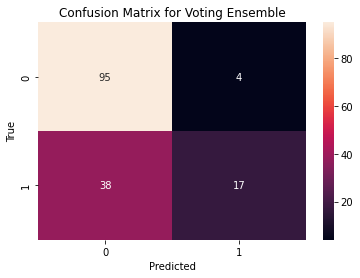

In [21]:
#Voting ensemble

# Fit the model and make predictions
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

# Print classification report
print("Classification Report for Voting Ensemble:")
print(classification_report(y_test, y_pred_voting))

# Print confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm_voting, annot=True, fmt='d')
plt.title('Confusion Matrix for Voting Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Classification Report for Stacking Ensemble:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



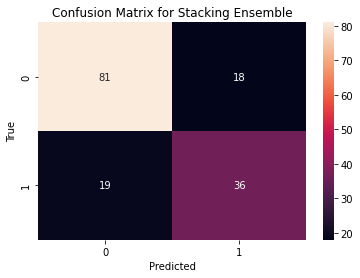

In [22]:
#Stacking ensemble

# Fit the model and make predictions
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)

# Print classification report
print("Classification Report for Stacking Ensemble:")
print(classification_report(y_test, y_pred_stacking))

# Print confusion matrix
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(cm_stacking, annot=True, fmt='d')
plt.title('Confusion Matrix for Stacking Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Testing on PIMA dataset without Glucose

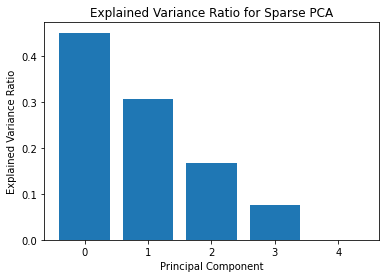

Sparse PCA Statistics:
Explained Variance Ratio:
Principal Component 1: 0.4515
Principal Component 2: 0.3067
Principal Component 3: 0.1667
Principal Component 4: 0.0749
Principal Component 5: 0.0001

Key Features:
Principal Component 1: BloodPressure
Principal Component 2: SkinThickness
Principal Component 3: Age
Principal Component 4: BMI
Principal Component 5: DiabetesPedigreeFunction


In [31]:
#Analyze the dataset after running sparse PCA.  What do we know about the attributes?

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA
from sklearn.model_selection import train_test_split

# Get the current directory
current_dir = os.getcwd()

# Find the .csv file in the current directory
csv_files = [file for file in os.listdir(current_dir) if file.endswith(".csv")]

# Check if the .csv file exists
if "diabetes.csv" in csv_files:
    dataset_file = os.path.join(current_dir, "diabetes.csv")
else:
    raise FileNotFoundError("diabetes.csv file not found in the current directory.")

# Define a data loader function
def load_dataset(file_path):
    # Load the dataset from the CSV file
    df = pd.read_csv(file_path)
    
    df.drop(['Glucose', 'Insulin'], axis=1, inplace=True)

    # Perform one-hot encoding for categorical variables
    df_encoded = pd.get_dummies(df, drop_first=True)
    
    # Get the feature names
    feature_names = df_encoded.columns[:-1]  # Exclude target variable

    # Extract the feature matrix X
    X = df_encoded.iloc[:, :-1].values

    X[:,0] = X[:,0]/max(X[:,0])
    
    # Extract the target variable y
    y = df_encoded.iloc[:, -1].values

    return X, y, feature_names

# Load the dataset using the data loader
X, y, feature_names = load_dataset(dataset_file)

# Initialize SparsePCA
sparse_pca = SparsePCA(n_components=5, random_state=42)

# Fit and transform the data
X_sparse = sparse_pca.fit_transform(X)

# Calculate the explained variance ratio manually
explained_variance = np.var(X_sparse, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Plot explained variance ratio
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Sparse PCA')
plt.show()


# Identify key features
key_features = np.abs(sparse_pca.components_).argmax(axis=1)

# Print statistics, plots, and key features
print("Sparse PCA Statistics:")
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

print("\nKey Features:")
for i, feature_idx in enumerate(key_features):
    print(f"Principal Component {i+1}: {feature_names[feature_idx]}")

After PCA, perform Logistic Regression

In [32]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Define hyperparameters for Logistic Regression
log_reg_params = {
    'penalty': 'l2',  # Regularization penalty ('l1', 'l2', 'elasticnet', 'none')
    'C': 1.0,  # Inverse of regularization strength
    'solver': 'lbfgs',  # Algorithm to use for optimization ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
    'max_iter': 100,  # Maximum number of iterations
    'random_state': 42  # Random seed for reproducibility
}

# Initialize Logistic Regression with hyperparameters
log_reg = LogisticRegression(**log_reg_params)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)

              precision    recall  f1-score   support

           0       0.67      0.77      0.72        99
           1       0.44      0.33      0.37        55

    accuracy                           0.61       154
   macro avg       0.56      0.55      0.55       154
weighted avg       0.59      0.61      0.59       154



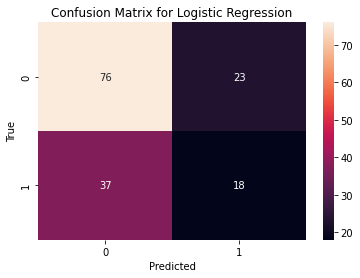

In [33]:
#Stats and plots for LogReg

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Fit the model and make predictions
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [34]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
random_forest.fit(X_train, y_train)

# Predict the test set results
y_pred = random_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.75      0.72      0.73        99
           1       0.53      0.56      0.54        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.66       154



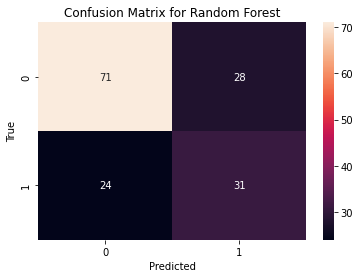

In [35]:
# Fit the model and make predictions
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Deep and Wide NN

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Hyperparameters
hyper_params = {
    'batch_size': 16,
    'learning_rate': 0.01,
    'epochs': 100,
    'input_size': X_sparse.shape[1],
    'hidden_size': 1000,
    'output_size': 1,
    'dropout_rate': 0.85,
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Convert to tensors
X_tensor = torch.tensor(X_train.astype(np.float32))
y_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)

# Create a Dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the Deep and Wide neural network
class DeepWideNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(DeepWideNN, self).__init__()
        self.deep = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        out = self.deep(x)
        return out

# Initialize the model, loss function, and optimizer
nn_model = DeepWideNN(
    input_size=hyper_params['input_size'],
    hidden_size=hyper_params['hidden_size'],
    output_size=hyper_params['output_size'],
    dropout_rate=hyper_params['dropout_rate']
).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(nn_model.parameters(), lr=hyper_params['learning_rate'])

# Training loop
for epoch in range(hyper_params['epochs']):
    for i, (inputs, labels) in enumerate(data_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = nn_model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{hyper_params["epochs"]}, Loss: {loss.item()}')

# Display the final loss
print(f"Final Loss: {loss.item()}")

# Save the model
torch.save(nn_model.state_dict(), "nn_model.pth")

Epoch 1/100, Loss: 20.791793823242188
Epoch 2/100, Loss: 44.22782516479492
Epoch 3/100, Loss: 38.46446990966797
Epoch 4/100, Loss: 1.3907747131725046e-07
Epoch 5/100, Loss: 15.098074913024902
Epoch 6/100, Loss: 9.862296104431152
Epoch 7/100, Loss: 29.11158561706543
Epoch 8/100, Loss: 33.82444381713867
Epoch 9/100, Loss: 4.166449546813965
Epoch 10/100, Loss: 15.55066967010498
Epoch 11/100, Loss: 5.8458733558654785
Epoch 12/100, Loss: 23.979211807250977
Epoch 13/100, Loss: 12.454957008361816
Epoch 14/100, Loss: 8.508410453796387
Epoch 15/100, Loss: 5.4785284996032715
Epoch 16/100, Loss: 9.999171257019043
Epoch 17/100, Loss: 2.6741201877593994
Epoch 18/100, Loss: 7.323064804077148
Epoch 19/100, Loss: 6.708254337310791
Epoch 20/100, Loss: 11.974491119384766
Epoch 21/100, Loss: 5.890085220336914
Epoch 22/100, Loss: 2.2800467014312744
Epoch 23/100, Loss: 12.7611083984375
Epoch 24/100, Loss: 6.8235182762146
Epoch 25/100, Loss: 8.885871887207031
Epoch 26/100, Loss: 15.988207817077637
Epoch 27/

## Tuning our Deep and Wide model


In [37]:
import json
from tqdm import tqdm
# Define a list or range of values for each hyperparameter
batch_sizes = [16,32,64,128, 256, 512]
learning_rates = [0.0001,0.001, 0.01, 0.1]
hidden_sizes = [50, 100, 500, 1000, 1500]
dropout_rates = [0.15, 0.3, 0.5, 0.7, 0.85]

# Placeholder variables for storing the best parameters and the best accuracy
best_params = None
best_accuracy = 0.0

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loop over the hyperparameters
for batch_size in tqdm(batch_sizes):
    for learning_rate in learning_rates:
        for hidden_size in hidden_sizes:
            for dropout_rate in dropout_rates:

                # Create a DataLoader with the current batch_size
                data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

                # Initialize the model, loss function, and optimizer with the current hyperparameters
                nn_model = DeepWideNN(
                    input_size=hyper_params['input_size'],
                    hidden_size=hidden_size,
                    output_size=hyper_params['output_size'],
                    dropout_rate=dropout_rate
                ).to(device)
                criterion = nn.BCEWithLogitsLoss()
                optimizer = optim.SGD(nn_model.parameters(), lr=learning_rate)

                # Training loop
                for epoch in range(hyper_params['epochs']):
                    for i, (inputs, labels) in enumerate(data_loader):
                        inputs, labels = inputs.to(device), labels.to(device)

                        # Forward pass
                        outputs = nn_model(inputs)
                        loss = criterion(outputs, labels)

                        # Backward and optimize
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # Evaluate the model on the test set to get the accuracy
                nn_model.eval()
                with torch.no_grad():
                    X_test_tensor = torch.tensor(X_test.astype(np.float32)).to(device)
                    y_test_tensor = torch.tensor(y_test.astype(np.float32)).unsqueeze(1).to(device)
                    outputs = nn_model(X_test_tensor)
                    predictions = torch.sigmoid(outputs) > 0.5
                    accuracy = (predictions == y_test_tensor).float().mean()

                # If the accuracy is better than the best_accuracy found so far, update the best_params and best_accuracy
                if accuracy > best_accuracy:
                    print(accuracy)
                    best_params = {'batch_size': batch_size, 'learning_rate': learning_rate, 
                                   'hidden_size': hidden_size, 'dropout_rate': dropout_rate}
                    best_accuracy = accuracy

# Print the best hyperparameters and the corresponding accuracy
print(f"Best Params: {best_params}, Best Accuracy: {best_accuracy}")

# Save the best parameters
with open("best_params.json", "w") as f:
    json.dump(best_params, f)


  0%|          | 0/6 [00:00<?, ?it/s]

tensor(0.6169)
tensor(0.6429)
tensor(0.6558)
tensor(0.6753)


 17%|█▋        | 1/6 [05:22<26:51, 322.34s/it]

tensor(0.6883)


 67%|██████▋   | 4/6 [13:56<06:02, 181.09s/it]

tensor(0.7013)


100%|██████████| 6/6 [17:02<00:00, 170.50s/it]

Best Params: {'batch_size': 256, 'learning_rate': 0.1, 'hidden_size': 1500, 'dropout_rate': 0.5}, Best Accuracy: 0.701298713684082


In [38]:
from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, criterion, optimizer, epochs):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.epochs = epochs

    def fit(self, X, y):

        dataset = TensorDataset(X, y)
        data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

        for epoch in range(self.epochs):
            for i, (inputs, labels) in enumerate(data_loader):
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                # Backward and optimize
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

        return self

    def predict_proba(self, X):
        with torch.no_grad():
            outputs = self.model(X)
            probs = torch.sigmoid(outputs)
            return probs.cpu().numpy()

    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas > 0.5).astype(int)

# Wrap the PyTorch model
nn_model_sklearn = PyTorchClassifier(nn_model, criterion, optimizer, epochs=hyper_params['epochs'])

# Now, you can use nn_model_sklearn in your sklearn ensemble models


              precision    recall  f1-score   support

           0       0.68      0.78      0.73        99
           1       0.46      0.35      0.40        55

    accuracy                           0.62       154
   macro avg       0.57      0.56      0.56       154
weighted avg       0.60      0.62      0.61       154



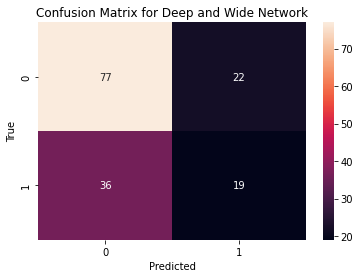

In [39]:
# Fit the model
X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.astype(np.float32))

nn_model_sklearn.fit(X_train_tensor, y_train_tensor)
y_pred = nn_model_sklearn.predict(X_test_tensor)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Deep and Wide Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [40]:
class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=5):
        self.model = model
        self.epochs = epochs

    def fit(self, X, y):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)
        self.model.fit(X_tensor, y_tensor)
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_pred = self.model.predict(X_tensor)
        return y_pred.cpu().numpy()

    def predict_proba(self, X):
        y_pred = self.predict(X)
        return np.column_stack((1 - y_pred, y_pred))

nn_model_sklearn_wrapped = PyTorchClassifierWrapper(nn_model_sklearn)

In [41]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=5):
        self.model = model
        self.epochs = epochs
        self.classes_ = None  # Initialize classes_ attribute

    def fit(self, X, y):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)
        self.classes_ = np.unique(y)  # update classes_ attribute on fit
        self.model.fit(X_tensor, y_tensor)
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_pred = self.model.predict(X_tensor)
        return y_pred 

    def predict_proba(self, X):
        y_pred = self.predict(X)
        return np.column_stack((1 - y_pred, y_pred))


nn_model_sklearn_wrapped = PyTorchClassifierWrapper(nn_model_sklearn)

# Initialize the ensemble models
voting = VotingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model_sklearn_wrapped)], voting='soft')
stacking = StackingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model_sklearn_wrapped)], final_estimator=LogisticRegression())

# Fit the voting ensemble model
voting.fit(X_train, y_train)

# Predict the test set results
y_pred_voting = voting.predict(X_test)

# Fit the stacking ensemble model
stacking.fit(X_train, y_train)

# Predict the test set results
y_pred_stacking = stacking.predict(X_test)

# Calculate the accuracy of the voting ensemble
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# Calculate the accuracy of the stacking ensemble
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Print the accuracies
print(f'Accuracy of voting ensemble: {accuracy_voting}')
print(f'Accuracy of stacking ensemble: {accuracy_stacking}')

# Choose the better model
if accuracy_voting > accuracy_stacking:
    best_model = voting
else:
    best_model = stacking


Accuracy of voting ensemble: 0.6233766233766234
Accuracy of stacking ensemble: 0.6363636363636364


Classification Report for Voting Ensemble:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        99
           1       0.46      0.35      0.40        55

    accuracy                           0.62       154
   macro avg       0.57      0.56      0.56       154
weighted avg       0.60      0.62      0.61       154



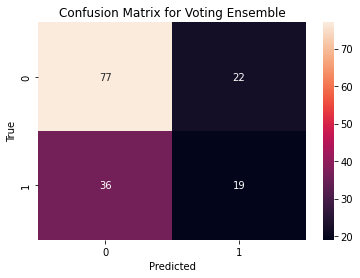

In [42]:
#Voting ensemble

# Fit the model and make predictions
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

# Print classification report
print("Classification Report for Voting Ensemble:")
print(classification_report(y_test, y_pred_voting))

# Print confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm_voting, annot=True, fmt='d')
plt.title('Confusion Matrix for Voting Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Classification Report for Stacking Ensemble:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        99
           1       0.49      0.40      0.44        55

    accuracy                           0.64       154
   macro avg       0.59      0.58      0.59       154
weighted avg       0.62      0.64      0.63       154



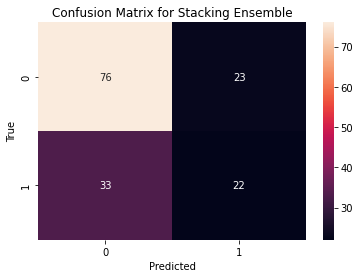

In [43]:
#Stacking ensemble

# Fit the model and make predictions
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)

# Print classification report
print("Classification Report for Stacking Ensemble:")
print(classification_report(y_test, y_pred_stacking))

# Print confusion matrix
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(cm_stacking, annot=True, fmt='d')
plt.title('Confusion Matrix for Stacking Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [30]:
import pandas as pd
import numpy as np

# Assuming you've already loaded your dataframe into df
# Replace df with the actual variable name if different
df = pd.read_csv(os.path.join(current_dir, "diabetes_data_upload.csv"))

# Transform the dataframe into a 1-D numpy array
data = df.values.flatten()

# Calculate the number of zero elements
num_zero_elements = np.count_nonzero(data==0)

# Calculate the total number of elements
total_elements = data.size

# Calculate the proportion of zero elements
sparseness = num_zero_elements / total_elements

print(f"The sparseness of the dataset is {sparseness:.4f}")

The sparseness of the dataset is 0.0000
